<a href="https://colab.research.google.com/github/Nithyarajoman/Machine-learning-Trial/blob/main/MNIST%20intermediate%20resultprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Read data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float')/255

4431872/4422102 [==============================] - 0s 0us/step


In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


In [15]:
# Create Model
model = keras.models.Sequential(
    [       
        layers.Conv2D(32, kernel_size=(3, 3),
                      input_shape=(28, 28, 1),
                      strides=(2,2), padding="same",
                      use_bias=False),
        layers.BatchNormalization(),
        layers.Activation(activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),
                      strides=(2,2), padding="same",
                      use_bias=False),
        layers.BatchNormalization(),
        layers.Activation(activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        288       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18432     
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 7, 7, 64)          0

In [17]:
# Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=15, batch_size=128, validation_split=0.1 )
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/15
422/422 [==============================] - 23s 54ms/step - loss: 0.5447 - accuracy: 0.8074 - val_loss: 0.5714 - val_accuracy: 0.8162
Epoch 2/15
422/422 [==============================] - 22s 52ms/step - loss: 0.3710 - accuracy: 0.8675 - val_loss: 0.3049 - val_accuracy: 0.8917
Epoch 3/15
422/422 [==============================] - 22s 53ms/step - loss: 0.3289 - accuracy: 0.8824 - val_loss: 0.2911 - val_accuracy: 0.8928
Epoch 4/15
422/422 [==============================] - 22s 53ms/step - loss: 0.3071 - accuracy: 0.8899 - val_loss: 0.2764 - val_accuracy: 0.8985
Epoch 5/15
422/422 [==============================] - 24s 56ms/step - loss: 0.2902 - accuracy: 0.8947 - val_loss: 0.2725 - val_accuracy: 0.9000
Epoch 6/15
422/422 [==============================] - 23s 54ms/step - loss: 0.2768 - accuracy: 0.9001 - val_loss: 0.2888 - val_accuracy: 0.8952
Epoch 7/15
422/422 [==============================] - 23s 54ms/step - loss: 0.2663 - accuracy: 0.9036 - val_loss: 0.2727 - val_accuracy:

In [18]:
# build a new model with outputs the output of BN
all_layers = [layer.output for layer in [model.get_layer(index=0),
                                        model.get_layer(index=1),
                                        model.get_layer(index=2),
                                        model.get_layer(index=3),
                                        model.get_layer(index=4),
                                        model.get_layer(index=5)]]

In [19]:
print(all_layers)

[<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'conv2d')>, <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'batch_normalization')>, <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'activation')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'conv2d_1')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'batch_normalization_1')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'activation_1')>]


In [ ]:
all_model = tf.keras.Model(inputs=model.inputs, outputs=all_layers)

In [41]:
all_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        288       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18432     
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                             

In [26]:
aux = all_model(x_train[:100])

In [38]:
#creating the model to predict
predict_layer_1 = tf.keras.Model(inputs=model.input, outputs = all_model.layers[1].output)
single_1 = x_train[:100]

In [39]:
predict_result_1 = predict_layer_1.predict(single_1)

In [40]:
print(predict_result_1.shape)

(100, 14, 14, 32)


In [ ]:
print(predict_result_1)

In [ ]:
print(x_train)

In [ ]:
print(aux)

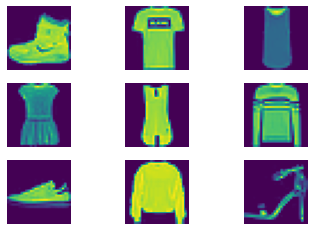

In [46]:
# input
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(single_1[i]))
    plt.axis('off')


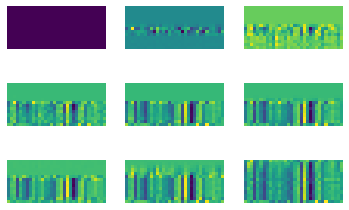

In [47]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(predict_result_1[0][i]))
    plt.axis('off')